In [33]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### **Common Part of the Question**

In [ ]:
#Library to load Dataset
import pickle
#Library to perform operations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Library to save the models using Joblib
from sklearn.externals import joblib 
#To measure the accuracy
from sklearn.metrics import accuracy_score
#Library to perform PCA
from sklearn.decomposition import PCA
#Library to perform tsne
from sklearn.manifold import TSNE
#Library for SVM - Support Vector Machine
from sklearn import svm 
#Library to perform Grid Search CV
from sklearn.model_selection import GridSearchCV 
#Library to measure time
import time

In [ ]:
#Loading both train and test data
with open('/content/data_batch_1', mode='rb') as file:
  data_1 = pickle.load(file, encoding='bytes')
  print(data_1)
with open('/content/data_batch_2', mode='rb') as file:
  data_2 = pickle.load(file, encoding='bytes')
  print(data_2)
with open('/content/data_batch_3', mode='rb') as file:
  data_3 = pickle.load(file, encoding='bytes')
  print(data_3)
with open('/content/data_batch_4', mode='rb') as file:
  data_4 = pickle.load(file, encoding='bytes')
  print(data_4)
with open('/content/data_batch_5', mode='rb') as file:
  data_5 = pickle.load(file, encoding='bytes')
  print(data_5)
with open('/content/test_batch', mode='rb') as file:
  data_6 = pickle.load(file, encoding='bytes')
  print(data_6)


{b'batch_label': b'training batch 1 of 5', b'labels': [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 

In [ ]:
#Printing the shape of the data
print(data_1[b'data'].shape)

(10000, 3072)


In [ ]:
#Printing the type and the keys of the data
print(type(data_1))
print(data_1.keys())

<class 'dict'>
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [ ]:
#Combining the train data and test data
train_data = np.concatenate((data_1[b'data'],data_2[b'data'],data_3[b'data']))
train1 = np.concatenate((data_4[b'data'],data_5[b'data']))
train_data = np.concatenate((train_data,train1))
print(train_data)
train_labels = np.concatenate((data_1[b'labels'],data_2[b'labels'],data_3[b'labels']))
train2 = np.concatenate((data_4[b'labels'],data_5[b'labels']))
train_labels = np.concatenate((train_labels,train2))
print(train_labels)
test_data = data_6[b'data']
print(test_data)
test_labels = data_6[b'labels']
print(test_labels)

[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 35  40  42 ...  77  66  50]
 [189 186 185 ... 169 171 171]
 [229 236 234 ... 173 162 161]]
[6 9 9 ... 9 1 1]
[[158 159 165 ... 124 129 110]
 [235 231 232 ... 178 191 199]
 [158 158 139 ...   8   3   7]
 ...
 [ 20  19  15 ...  50  53  47]
 [ 25  15  23 ...  80  81  80]
 [ 73  98  99 ...  94  58  26]]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 

In [ ]:
#Printing the shape of the newly formed train and test data
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
test_labels = np.asarray(test_labels)
print(test_labels.shape)

(50000, 3072)
(50000,)
(10000, 3072)
(10000,)


In [ ]:
#Printing the maximum and minimum values of the train dataset
print(train_data.max(),train_data.min())

255 0


In [ ]:
#Printing the maximum and minimum values of the test dataset
print(test_data.max(),test_data.min())

255 0


In [ ]:
#Normalising the train Dataset 
train_data_nor = train_data/255
print(train_data_nor)

[[0.23137255 0.16862745 0.19607843 ... 0.54901961 0.32941176 0.28235294]
 [0.60392157 0.49411765 0.41176471 ... 0.54509804 0.55686275 0.56470588]
 [1.         0.99215686 0.99215686 ... 0.3254902  0.3254902  0.32941176]
 ...
 [0.1372549  0.15686275 0.16470588 ... 0.30196078 0.25882353 0.19607843]
 [0.74117647 0.72941176 0.7254902  ... 0.6627451  0.67058824 0.67058824]
 [0.89803922 0.9254902  0.91764706 ... 0.67843137 0.63529412 0.63137255]]


In [ ]:
#Normalising the test Dataset
test_data_nor = test_data/255
print(test_data_nor)

[[0.61960784 0.62352941 0.64705882 ... 0.48627451 0.50588235 0.43137255]
 [0.92156863 0.90588235 0.90980392 ... 0.69803922 0.74901961 0.78039216]
 [0.61960784 0.61960784 0.54509804 ... 0.03137255 0.01176471 0.02745098]
 ...
 [0.07843137 0.0745098  0.05882353 ... 0.19607843 0.20784314 0.18431373]
 [0.09803922 0.05882353 0.09019608 ... 0.31372549 0.31764706 0.31372549]
 [0.28627451 0.38431373 0.38823529 ... 0.36862745 0.22745098 0.10196078]]


In [ ]:
# #Printing the columns for the dataset
# feat_cols = []
# for i in range(0,train_data.shape[1]):
#   feat_cols.append('value' + str(i))
# print(feat_cols)

['value0', 'value1', 'value2', 'value3', 'value4', 'value5', 'value6', 'value7', 'value8', 'value9', 'value10', 'value11', 'value12', 'value13', 'value14', 'value15', 'value16', 'value17', 'value18', 'value19', 'value20', 'value21', 'value22', 'value23', 'value24', 'value25', 'value26', 'value27', 'value28', 'value29', 'value30', 'value31', 'value32', 'value33', 'value34', 'value35', 'value36', 'value37', 'value38', 'value39', 'value40', 'value41', 'value42', 'value43', 'value44', 'value45', 'value46', 'value47', 'value48', 'value49', 'value50', 'value51', 'value52', 'value53', 'value54', 'value55', 'value56', 'value57', 'value58', 'value59', 'value60', 'value61', 'value62', 'value63', 'value64', 'value65', 'value66', 'value67', 'value68', 'value69', 'value70', 'value71', 'value72', 'value73', 'value74', 'value75', 'value76', 'value77', 'value78', 'value79', 'value80', 'value81', 'value82', 'value83', 'value84', 'value85', 'value86', 'value87', 'value88', 'value89', 'value90', 'value91

In [ ]:
# #Creating the Dataframe of the train data
# data_cifar = pd.DataFrame(train_data_nor,columns = feat_cols)
# data_cifar['label'] = train_labels
# print(data_cifar)

         value0    value1    value2  ...  value3070  value3071  label
0      0.231373  0.168627  0.196078  ...   0.329412   0.282353      6
1      0.603922  0.494118  0.411765  ...   0.556863   0.564706      9
2      1.000000  0.992157  0.992157  ...   0.325490   0.329412      9
3      0.109804  0.145098  0.149020  ...   0.145098   0.180392      4
4      0.666667  0.658824  0.694118  ...   0.305882   0.313725      1
...         ...       ...       ...  ...        ...        ...    ...
49995  0.568627  0.592157  0.611765  ...   0.207843   0.211765      2
49996  1.000000  0.996078  1.000000  ...   0.317647   0.298039      6
49997  0.137255  0.156863  0.164706  ...   0.258824   0.196078      9
49998  0.741176  0.729412  0.725490  ...   0.670588   0.670588      1
49999  0.898039  0.925490  0.917647  ...   0.635294   0.631373      1

[50000 rows x 3073 columns]


In [ ]:
# joblib.dump(data_cifar, 'data_Q1_pca.pkl')

['data_Q1_pca.pkl']

In [ ]:
data_cifar = joblib.load('/content/data_Q1_pca.pkl')
print(data_cifar)

         value0    value1    value2  ...  value3070  value3071  label
0      0.231373  0.168627  0.196078  ...   0.329412   0.282353      6
1      0.603922  0.494118  0.411765  ...   0.556863   0.564706      9
2      1.000000  0.992157  0.992157  ...   0.325490   0.329412      9
3      0.109804  0.145098  0.149020  ...   0.145098   0.180392      4
4      0.666667  0.658824  0.694118  ...   0.305882   0.313725      1
...         ...       ...       ...  ...        ...        ...    ...
49995  0.568627  0.592157  0.611765  ...   0.207843   0.211765      2
49996  1.000000  0.996078  1.000000  ...   0.317647   0.298039      6
49997  0.137255  0.156863  0.164706  ...   0.258824   0.196078      9
49998  0.741176  0.729412  0.725490  ...   0.670588   0.670588      1
49999  0.898039  0.925490  0.917647  ...   0.635294   0.631373      1

[50000 rows x 3073 columns]


In [ ]:
# #Printing the columns for the test Dataset
# feat_cols = []
# for i in range(0,test_data.shape[1]):
#   feat_cols.append('value' + str(i))
# print(feat_cols)

['value0', 'value1', 'value2', 'value3', 'value4', 'value5', 'value6', 'value7', 'value8', 'value9', 'value10', 'value11', 'value12', 'value13', 'value14', 'value15', 'value16', 'value17', 'value18', 'value19', 'value20', 'value21', 'value22', 'value23', 'value24', 'value25', 'value26', 'value27', 'value28', 'value29', 'value30', 'value31', 'value32', 'value33', 'value34', 'value35', 'value36', 'value37', 'value38', 'value39', 'value40', 'value41', 'value42', 'value43', 'value44', 'value45', 'value46', 'value47', 'value48', 'value49', 'value50', 'value51', 'value52', 'value53', 'value54', 'value55', 'value56', 'value57', 'value58', 'value59', 'value60', 'value61', 'value62', 'value63', 'value64', 'value65', 'value66', 'value67', 'value68', 'value69', 'value70', 'value71', 'value72', 'value73', 'value74', 'value75', 'value76', 'value77', 'value78', 'value79', 'value80', 'value81', 'value82', 'value83', 'value84', 'value85', 'value86', 'value87', 'value88', 'value89', 'value90', 'value91

In [ ]:
# data_cifar_test = pd.DataFrame(test_data_nor,columns = feat_cols)
# data_cifar_test['label'] = test_labels
# print(data_cifar_test)

        value0    value1    value2  ...  value3070  value3071  label
0     0.619608  0.623529  0.647059  ...   0.505882   0.431373      3
1     0.921569  0.905882  0.909804  ...   0.749020   0.780392      8
2     0.619608  0.619608  0.545098  ...   0.011765   0.027451      8
3     0.607843  0.654902  0.690196  ...   0.203922   0.196078      0
4     0.254902  0.274510  0.188235  ...   0.572549   0.458824      6
...        ...       ...       ...  ...        ...        ...    ...
9995  0.298039  0.298039  0.301961  ...   0.917647   0.925490      8
9996  0.317647  0.356863  0.384314  ...   0.576471   0.627451      3
9997  0.078431  0.074510  0.058824  ...   0.207843   0.184314      5
9998  0.098039  0.058824  0.090196  ...   0.317647   0.313725      1
9999  0.286275  0.384314  0.388235  ...   0.227451   0.101961      7

[10000 rows x 3073 columns]


In [ ]:
# joblib.dump(data_cifar_test, 'data_Q1_pca_test.pkl')

['data_Q1_pca_test.pkl']

In [ ]:
data_cifar_test = joblib.load('/content/data_Q1_pca_test.pkl')
print(data_cifar_test)

        value0    value1    value2  ...  value3070  value3071  label
0     0.619608  0.623529  0.647059  ...   0.505882   0.431373      3
1     0.921569  0.905882  0.909804  ...   0.749020   0.780392      8
2     0.619608  0.619608  0.545098  ...   0.011765   0.027451      8
3     0.607843  0.654902  0.690196  ...   0.203922   0.196078      0
4     0.254902  0.274510  0.188235  ...   0.572549   0.458824      6
...        ...       ...       ...  ...        ...        ...    ...
9995  0.298039  0.298039  0.301961  ...   0.917647   0.925490      8
9996  0.317647  0.356863  0.384314  ...   0.576471   0.627451      3
9997  0.078431  0.074510  0.058824  ...   0.207843   0.184314      5
9998  0.098039  0.058824  0.090196  ...   0.317647   0.313725      1
9999  0.286275  0.384314  0.388235  ...   0.227451   0.101961      7

[10000 rows x 3073 columns]


### **Question 1a - PCA**

In [ ]:
def Question1a(data_cifar,data_cifar_test):
  pca_train = PCA(0.9)
  #Fitting the dataset
  pca_trans = pca_train.fit(data_cifar.iloc[:,:-1])
  #Finding the number of components
  comp = pca_trans.n_components_
  print("The number of components after PCA ",comp)
  #Transforming the Training Dataset
  train_img_pca = pca_trans.transform(data_cifar.iloc[:,:-1])
  print("Shape of train dataset ",train_img_pca.shape)
  test_img_pca = pca_trans.transform(data_cifar_test.iloc[:,:-1])
  print("Shape of test dataset ",test_img_pca.shape)
  return train_img_pca,test_img_pca

train_img_pca,test_img_pca = Question1a(data_cifar,data_cifar_test)

The number of components after PCA  99
Shape of train dataset  (50000, 99)
Shape of test dataset  (10000, 99)


In [ ]:
#Finding the columns of the Dataset after PCA
feat_cols1 = []
for i in range(train_img_pca.shape[1]):
  feat_cols1.append('value' + str(i))
print(feat_cols1)

['value0', 'value1', 'value2', 'value3', 'value4', 'value5', 'value6', 'value7', 'value8', 'value9', 'value10', 'value11', 'value12', 'value13', 'value14', 'value15', 'value16', 'value17', 'value18', 'value19', 'value20', 'value21', 'value22', 'value23', 'value24', 'value25', 'value26', 'value27', 'value28', 'value29', 'value30', 'value31', 'value32', 'value33', 'value34', 'value35', 'value36', 'value37', 'value38', 'value39', 'value40', 'value41', 'value42', 'value43', 'value44', 'value45', 'value46', 'value47', 'value48', 'value49', 'value50', 'value51', 'value52', 'value53', 'value54', 'value55', 'value56', 'value57', 'value58', 'value59', 'value60', 'value61', 'value62', 'value63', 'value64', 'value65', 'value66', 'value67', 'value68', 'value69', 'value70', 'value71', 'value72', 'value73', 'value74', 'value75', 'value76', 'value77', 'value78', 'value79', 'value80', 'value81', 'value82', 'value83', 'value84', 'value85', 'value86', 'value87', 'value88', 'value89', 'value90', 'value91

In [ ]:
#Creating a Dataframe of training data after PCA
# data_cifar_pca = pd.DataFrame(train_img_pca,columns = feat_cols1)
# data_cifar_pca['label'] = train_labels
# print(data_cifar_pca)
# joblib.dump(data_cifar_pca, 'data_Q1_after_pca.pkl')
data_cifar_pca = joblib.load('/content/data_Q1_after_pca.pkl')


          value0     value1    value2  ...   value97   value98  label
0      -6.401018   2.729039  1.501711  ...  0.138932  0.153686      6
1       0.829783  -0.949943  6.003753  ...  0.542599  0.296815      9
2       7.730200 -11.522102 -2.753621  ...  0.497724  0.012754      9
3     -10.347817   0.010738  1.101019  ... -0.291689 -0.115827      4
4      -2.625651  -4.969240  1.034585  ... -0.495863 -0.313275      1
...          ...        ...       ...  ...       ...       ...    ...
49995   7.106037  -5.851024  9.370926  ... -0.023157  0.185450      2
49996   6.216884   1.898764 -7.042042  ...  0.703926 -0.260833      6
49997   0.707347 -11.342521 -0.393915  ... -0.163927 -0.224341      9
49998  11.367909  -3.375978  5.566198  ...  0.897445  0.874394      1
49999   4.192796  -1.184188 -4.445963  ... -0.291792  0.264010      1

[50000 rows x 100 columns]


In [ ]:
# data_cifar_test_pca = pd.DataFrame(test_img_pca,columns = feat_cols1)
# data_cifar_test_pca['label'] = test_labels
# print(data_cifar_test_pca)
# joblib.dump(data_cifar_test_pca, 'data_Q1test_after_pca.pkl')
data_cifar_test_pca = joblib.load('/content/data_Q1test_after_pca.pkl')

         value0    value1     value2  ...   value97   value98  label
0     -3.479671  0.906426   1.251956  ... -0.073715 -0.174357      3
1      9.943158 -9.580553   5.068578  ... -0.676948  0.699004      8
2      4.704300 -8.837206   4.109285  ... -0.119398  0.410197      8
3      8.046408 -3.812435   6.268061  ... -0.300682 -0.444346      0
4     -5.254615  4.320979   1.844344  ...  0.329352  0.585919      6
...         ...       ...        ...  ...       ...       ...    ...
9995   4.492343  8.777896  10.056820  ...  0.123905 -0.152211      8
9996  -3.608379  8.053298  -0.616506  ... -0.099950  0.747341      3
9997 -15.291193  2.503087  -0.227169  ...  0.225083  0.011573      5
9998  -5.857079  2.044375   3.654889  ...  0.654767  0.691145      1
9999  -1.765429 -1.891173  -2.148852  ... -0.554516  0.099114      7

[10000 rows x 100 columns]


In [ ]:
#Printing the unique values of the labels
print(data_cifar['label'].unique())

[6 9 4 1 2 7 8 3 5 0]


### **Question 1b**

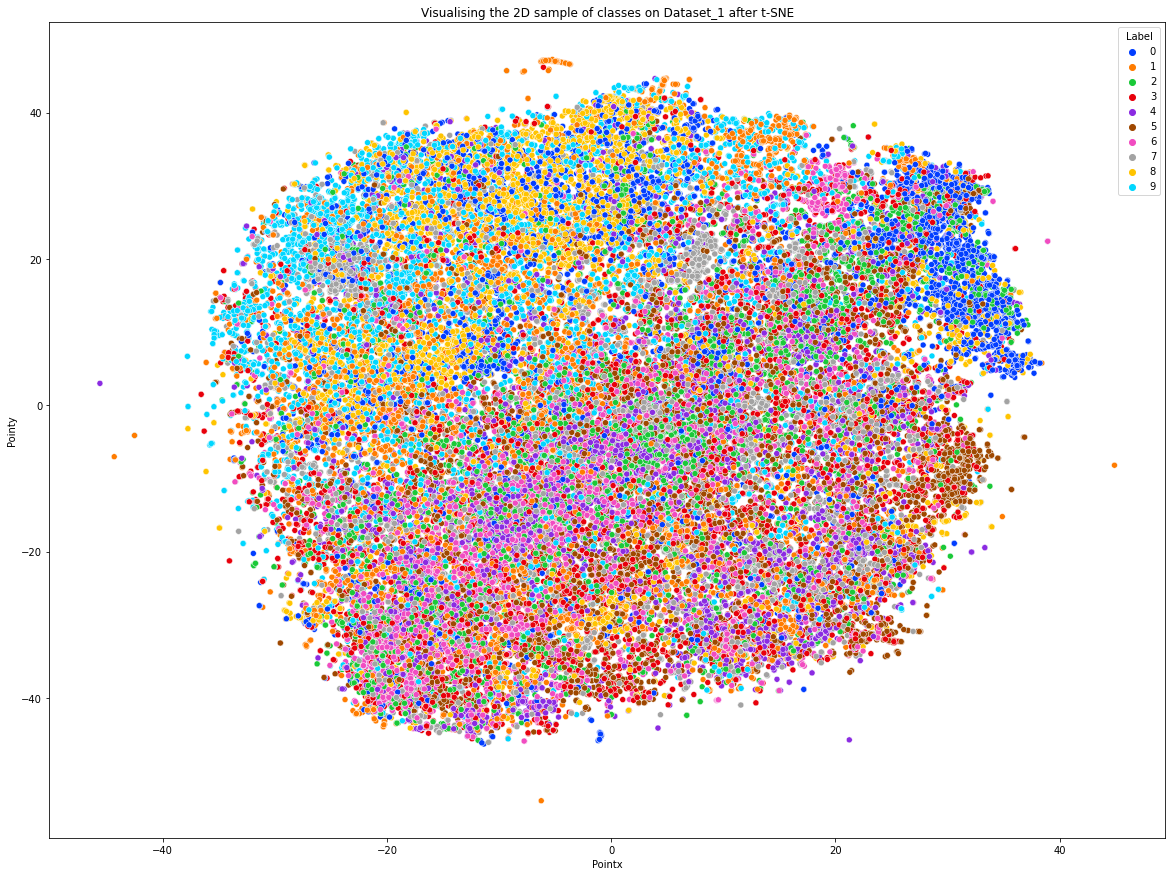

In [ ]:
def Question1b(data_cifar_pca):
  #Using t-SNE to reduce to 2 dimensions
  tsne_2d = TSNE(n_components = 2,random_state=0)
  X_2d = tsne_2d.fit_transform(data_cifar_pca.iloc[:,:-1])
  #Keeping the 2 points as there are 2 dimensions 
  pointx = X_2d[:,0]
  pointy = X_2d[:,1]
  #Storing the Label data
  label = data_cifar_pca['label']
  #Making a dataframe of the 2 points and labels
  dataframe_1c = pd.DataFrame(list(zip(pointx,pointy,label)), columns=["Pointx","Pointy","Label"])
  #Creating a figure of size 15*15
  plt.figure(figsize=(20,15))
  #Taking 10 colours for printing each class
  palette = sns.color_palette("bright", 10) 
  #Plotting the scatterplot for 2 Points using seaborn
  sns.scatterplot(data=dataframe_1c, x="Pointx",y="Pointy",hue = "Label",legend='full',palette=palette)
  #Labelling the Plot
  plt.xlabel('Pointx')
  plt.ylabel('Pointy')
  plt.title("Visualising the 2D sample of classes on Dataset_1 after t-SNE")
  plt.show()

Question1b(data_cifar_pca)

**Getting the X_train, Y_train and X_test, Y_test**

In [ ]:
#Getting the X_train and Y_train after PCA
X_train = data_cifar_pca.iloc[:,:-1]
Y_train = data_cifar_pca.iloc[:,-1]
print(X_train,Y_train)

          value0     value1    value2  ...   value96   value97   value98
0      -6.401018   2.729039  1.501711  ... -0.457672  0.138932  0.153686
1       0.829783  -0.949943  6.003753  ...  0.495597  0.542599  0.296815
2       7.730200 -11.522102 -2.753621  ... -0.519133  0.497724  0.012754
3     -10.347817   0.010738  1.101019  ... -0.157768 -0.291689 -0.115827
4      -2.625651  -4.969240  1.034585  ...  0.195278 -0.495863 -0.313275
...          ...        ...       ...  ...       ...       ...       ...
49995   7.106037  -5.851024  9.370926  ...  0.043374 -0.023157  0.185450
49996   6.216884   1.898764 -7.042042  ... -0.111870  0.703926 -0.260833
49997   0.707347 -11.342521 -0.393915  ...  0.448216 -0.163927 -0.224341
49998  11.367909  -3.375978  5.566198  ... -0.344208  0.897445  0.874394
49999   4.192796  -1.184188 -4.445963  ...  0.114179 -0.291792  0.264010

[50000 rows x 99 columns] 0        6
1        9
2        9
3        4
4        1
        ..
49995    2
49996    6
49997    

In [ ]:
#Getting the X_test and Y_test after PCA
X_test = data_cifar_test_pca.iloc[:,:-1]
Y_test = data_cifar_test_pca.iloc[:,-1]
print(X_test,Y_test)

         value0    value1     value2  ...   value96   value97   value98
0     -3.479671  0.906426   1.251956  ... -0.473390 -0.073715 -0.174357
1      9.943158 -9.580553   5.068578  ...  0.099927 -0.676948  0.699004
2      4.704300 -8.837206   4.109285  ...  0.043336 -0.119398  0.410197
3      8.046408 -3.812435   6.268061  ...  0.413735 -0.300682 -0.444346
4     -5.254615  4.320979   1.844344  ... -0.217617  0.329352  0.585919
...         ...       ...        ...  ...       ...       ...       ...
9995   4.492343  8.777896  10.056820  ...  0.524404  0.123905 -0.152211
9996  -3.608379  8.053298  -0.616506  ... -0.075252 -0.099950  0.747341
9997 -15.291193  2.503087  -0.227169  ...  0.569591  0.225083  0.011573
9998  -5.857079  2.044375   3.654889  ...  0.485517  0.654767  0.691145
9999  -1.765429 -1.891173  -2.148852  ... -0.284555 -0.554516  0.099114

[10000 rows x 99 columns] 0       3
1       8
2       8
3       0
4       6
       ..
9995    8
9996    3
9997    5
9998    1
9999    7

### **Question 1c**

In [ ]:
def Question1c(X_train,Y_train):
#GridSearch CV for rbf kernel
  param_grid = {'C' : [0.1,1,10,100],
                'gamma' : ['auto'],
                'kernel' : ['rbf']}

  grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv = 5)
  grid.fit(X_train, Y_train) 
  # print best parameter after tuning 
  print(grid.best_params_) 
  # print how our model looks after hyper-parameter tuning 
  print(grid.best_estimator_) 
  return grid

#grid = Question1c(X_train,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1, gamma=auto, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.447, total=10.9min
[CV] C=0.1, gamma=auto, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 10.9min remaining:    0.0s


[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.439, total=11.4min
[CV] C=0.1, gamma=auto, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 22.3min remaining:    0.0s


[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.454, total=10.5min
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.445, total=11.1min
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.445, total=10.2min
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.546, total= 8.4min
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.529, total= 8.4min
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.547, total= 8.8min
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.536, total= 8.4min
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 193.0min finished


{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
#time taken by grid search
print(grid.refit_time_)
#Best score obtained by grid search
print(grid.best_score_)

1053.3253722190857
0.5475


In [ ]:
#Printing the Grid data
print(grid)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['auto'],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)


**Running on best parameters obtained**

**Saving Model**

In [ ]:
def run_bestparam(X_train,Y_train,X_test,Y_test):
  start = time.time()
  model = svm.SVC(kernel='rbf', C=10, gamma = 'auto')
  model.fit(X_train, Y_train)
  joblib.dump(model, 'best_param_model.pkl')
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  print("Accuracy between Y_train and pred_train ",accuracy_score(Y_test,y_pred))
  print("Accuracy between Y_test and pred_test ",accuracy_score(Y_train,y_pred_train))
  end = time.time()
  print(f"Runtime of the program is {end - start}")

run_bestparam(X_train,Y_train,X_test,Y_test)

Accuracy between Y_train and pred_train  0.5593
Accuracy between Y_test and pred_test  0.98134
Runtime of the program is 1802.7410762310028


**Loading model**

In [ ]:
def run_bestparam(X_train,Y_train,X_test,Y_test):
  start = time.time()
  model = joblib.load('/content/best_param_model.pkl')
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  print("Accuracy between Y_test and pred_test ",accuracy_score(Y_test,y_pred))
  print("Accuracy between Y_train and pred_train ",accuracy_score(Y_train,y_pred_train))
  end = time.time()
  print(f"Runtime of the program is {end - start}")

run_bestparam(X_train,Y_train,X_test,Y_test)

Accuracy between Y_test and pred_test  0.5593
Accuracy between Y_train and pred_train  0.98134
Runtime of the program is 553.8056337833405


### **Question 1d**

**Saving the model**

In [ ]:
def Question1d(X_test,Y_test):
  model = joblib.load('/content/best_param_model.pkl')
  sv = model.support_vectors_
  index_sv = model.support_
  print("Number of Support Vectors", len(index_sv))
  feat_cols1.append('label')
  data_sv = pd.DataFrame(columns = feat_cols1)
  print("The formed dataframe is ")
  for i in index_sv:
    l = data_cifar_pca.iloc[i,:]
    data_sv = data_sv.append(l, ignore_index= True)
  data_sv = data_sv.astype({"label":int})
  print(data_sv)
  X_train_sv = data_sv.iloc[:,:-1]
  Y_train_sv = data_sv.iloc[:,-1]
  print("The X_train and Y_train are")
  print(X_train_sv)
  print(Y_train_sv)
  model_sv = svm.SVC(kernel='rbf', C=10, gamma = 'auto')
  model_sv.fit(X_train_sv, Y_train_sv)
  joblib.dump(model_sv, 'support_vector_model.pkl')
  y_pred_sv = model_sv.predict(X_test)
  y_pred_train_sv = model_sv.predict(X_train_sv)
  print("Accuracy between Y_train and pred_train ",accuracy_score(Y_train_sv,y_pred_train_sv))
  print("Accuracy between Y_test and pred_test ",accuracy_score(Y_test,y_pred_sv))

Question1d(X_test,Y_test)

Number of Support Vectors 45581
The formed dataframe is 
          value0     value1    value2  ...   value97   value98  label
0      11.566968  -5.927320 -6.834133  ...  0.456946 -0.970656      0
1       0.010111   1.239541  2.567041  ...  0.656049 -0.154990      0
2      -1.151421  -3.317049 -3.733698  ...  0.054864 -0.301086      0
3      16.506653   6.893446 -4.924058  ...  0.744170  0.164404      0
4      -7.201185  -1.153797  5.558764  ...  0.083363  0.200283      0
...          ...        ...       ...  ...       ...       ...    ...
45576   1.167613  -8.427630  1.008911  ...  0.124166 -0.376802      9
45577  13.318893   2.316739  1.736451  ...  0.162193  0.545228      9
45578  -5.240029   0.909079  0.134935  ... -0.122524 -0.094700      9
45579   1.467291  -4.167102 -2.093366  ... -0.357612  0.207747      9
45580   0.707347 -11.342521 -0.393915  ... -0.163927 -0.224341      9

[45581 rows x 100 columns]
The X_train and Y_train are
          value0     value1    value2  ...   va

**Loading the model**

In [ ]:
def Question1d_load(X_test,Y_test):
  model_sv = joblib.load('/content/support_vector_model.pkl')
  y_pred_sv = model_sv.predict(X_test)
  y_pred_train_sv = model_sv.predict(X_train_sv)
  print("Accuracy between Y_train and pred_train ",accuracy_score(Y_train_sv,y_pred_train_sv))
  print("Accuracy between Y_test and pred_test ",accuracy_score(Y_test,y_pred_sv))
